In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from Gaussian_Matrix_Ops import *
import time

# Lorenz 1963

In [5]:
par = np.array([10,28,8/3])

x0 = np.array([1,0.2,19])
t = np.arange(0,500,0.002)

#lorenz63 model
def lorenz63(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*(-x + y),
        x*(par[1] - z) - y,
        -par[2]*z + x*y]
    return dXdt
solL63 = odeint(lorenz63,x0,t)

In [41]:
np.save('L63_002.npy',solL63)

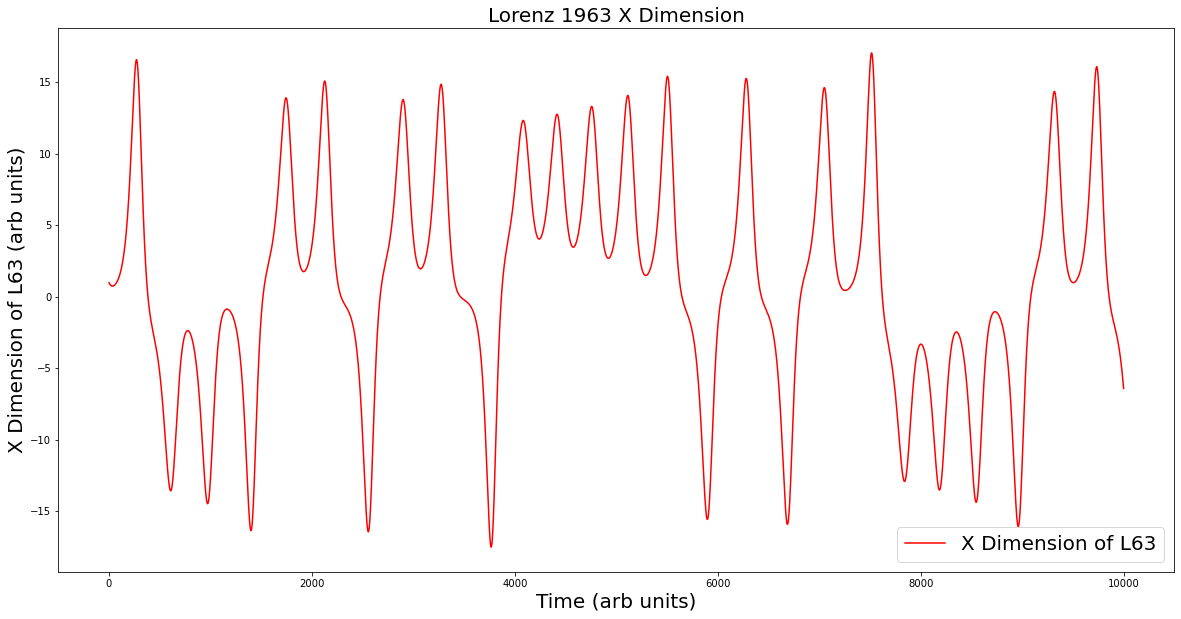

In [6]:
plt.figure(figsize=(20,10))
plt.plot(solL63.T[0][0:10000],color = 'r',label = 'X Dimension of L63')
plt.xlabel('Time (arb units)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension',fontsize=20)
#plt.savefig('L63 Update Graph')
plt.show()

In [7]:
XData = solL63.T
NoCenters = 500
Length = 10000


start_time = time.time()
DDF = GaussMat()
Center = DDF.KmeanCenter(solL63[0:Length].T,NoCenters,Length)
#Center = np.load('Center_L63_500c_10k_002.npy')
np.save('Center_L63_500c_10k_002',Center)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.5921337604522705 seconds ---


In [8]:
PredLength = 20000
beta = 0.011350091952587656
R = 0.010720697084284608

#beta = 0.01104738296670726
#R = 0.010650809436877413

#beta = 0.0002851562578104404
#R = 0.12298042213564654
D = 3

start_time = time.time()
Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,D)
Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7392270565032959 seconds ---


In [9]:
Lyap_large = 0.9056
maxx = PredLength
X = np.arange(0,maxx*0.002*Lyap_large,0.002*Lyap_large)

In [10]:
8713*.002*0.9056

15.780985600000001

0.011350091952587656
0.010720697084284608


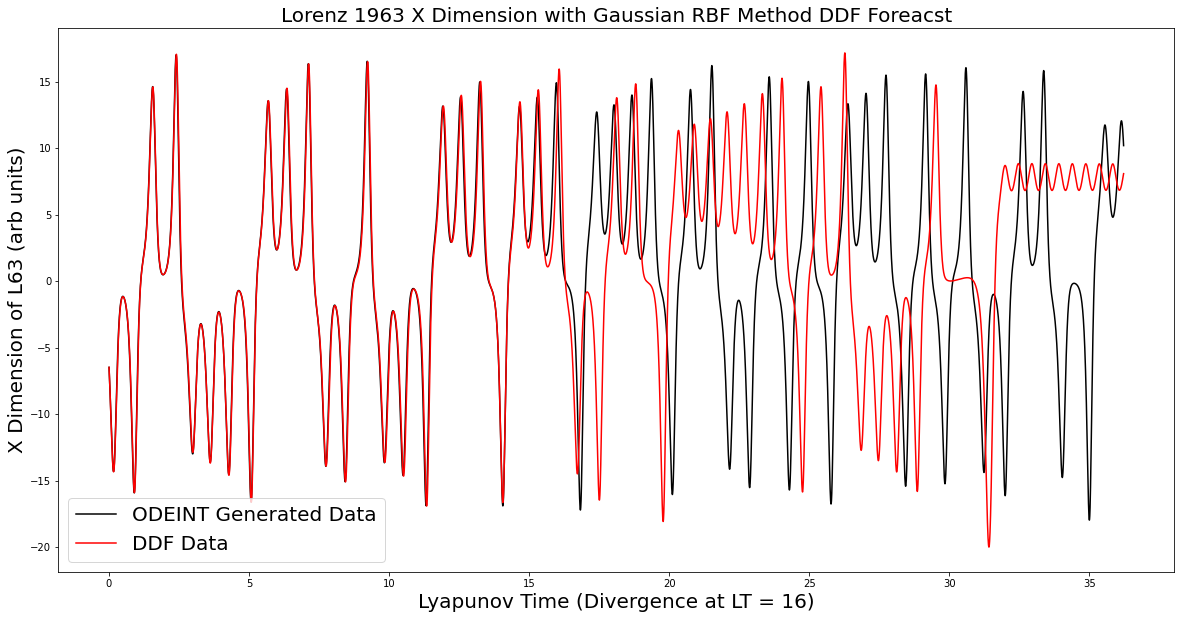

In [11]:
print(beta)
print(R)
plt.figure(figsize=(20,10))
plt.plot(X,XData[0,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
plt.plot(X,Pred[0],color = 'r',label = 'DDF Data')
plt.xlabel('Lyapunov Time (Divergence at LT = 16)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension with Gaussian RBF Method DDF Foreacst',fontsize=20)
plt.savefig('L63 Gauss RBF Method')
plt.show()

In [12]:
#Grid Search
for i in range(15):
    for j in range(15):
        PredLength = 10000
        beta = 10**(-12+i)
        R = 10**(-12+j)
        D = 3

        start_time = time.time()
        Funky = DDF.FuncApproxF(XData,Length,Center,beta,R,D)
        Pred = DDF.PredictIntoTheFuture(Funky,PredLength,DDF.FinalX)
        print("--- %s seconds ---" % (time.time() - start_time))
        

        plt.figure(figsize=(20,10))
        plt.plot(X,XData[0,Length:Length+PredLength],color = 'black',label = 'ODEINT Generated Data')
        plt.plot(X,Pred[0],color = 'r',label = 'DDF Data')
        plt.xlabel('Lyapunov Time (Divergence at LT = ??)',fontsize=20)
        plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
        plt.legend(fontsize=20)
        plt.title('Lorenz 1963 X Dimension with Taylor Method DDF Foreacst',fontsize=20)
        plt.savefig(str(i)+' and '+str(j))
        plt.show()